<a href="https://colab.research.google.com/github/Mahesh0468/Mahesh0468/blob/main/moviegenerclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
train_path = '/content/train_data.csv'
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data.head()

,Title,Genre,Description
"""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
"""2",Cupid (1997),thriller,A brother and sister with a past incestuous r...
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
test_path = "/content/test_data.csv"
test_data = pd.read_csv(test_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
test_data.head()

,Title,Genre,Description
0,"""1",Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,"""2",La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,"""3",Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,"""4",Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,"""5",Er nu zhai (1955),Before he was known internationally as a mart...


In [9]:
test_data.columns
train_data.columns

Index(['Title', 'Genre', 'Description'], dtype='object')

In [10]:
test_data.info()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Genre        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, "1  to "54214 
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [11]:
print("DataFrame shape of Training Dataset:", train_data.shape)
print("DataFrame shape of Testing Dataset:", test_data.shape)

DataFrame shape of Training Dataset: (54214, 3)
DataFrame shape of Testing Dataset: (54200, 3)


In [12]:
# Check for missing values
print(train_data.isnull().sum())

# Check data types
print(train_data.dtypes)

# Check for duplicate rows
print(train_data.duplicated().sum())

#TESTING DATA


# Check for missing values
print(test_data.isnull().sum())

# Check data types
print(test_data.dtypes)

# Check for duplicate rows
print(test_data.duplicated().sum())

Title          0
Genre          0
Description    0
dtype: int64
Title          object
Genre          object
Description    object
dtype: object
0
Title          0
Genre          0
Description    0
dtype: int64
Title          object
Genre          object
Description    object
dtype: object
0


In [13]:
import re

def clean_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)

    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'\W+', ' ', text)
    text = text.strip()
    return text

# Clean the textual data in train_data
train_data['Title'] = train_data['Title'].apply(clean_text)
train_data['Description'] = train_data['Description'].apply(clean_text)

# Clean the textual data in test_data
test_data['Title'] = test_data['Title'].apply(clean_text)
test_data['Description'] = test_data['Description'].apply(clean_text)

# Display the first few rows of the cleaned data to verify
print("Cleaned Train Data:")
print(train_data.head())

print("\nCleaned Test Data:")
print(test_data.head())

Cleaned Train Data:
                             Title       Genre  \
"1      oscar et la dame rose 2009      drama    
"2                      cupid 1997   thriller    
"3   young wild and wonderful 1980      adult    
"4             the secret sin 1915      drama    
"5            the unrecovered 2007      drama    

                                           Description  
"1   listening in to a conversation between his doc...  
"2   a brother and sister with a past incestuous re...  
"3   as the bus empties the students for their fiel...  
"4   to help their unemployed father make ends meet...  
"5   the film s title refers not only to the un rec...  

Cleaned Test Data:
  Title                          Genre  \
0     1          Edgar's Lunch (1998)    
1     2      La guerra de papá (1977)    
2     3   Off the Beaten Track (2010)    
3     4        Meu Amigo Hindu (2015)    
4     5             Er nu zhai (1955)    

                                         Description  
0  l r br

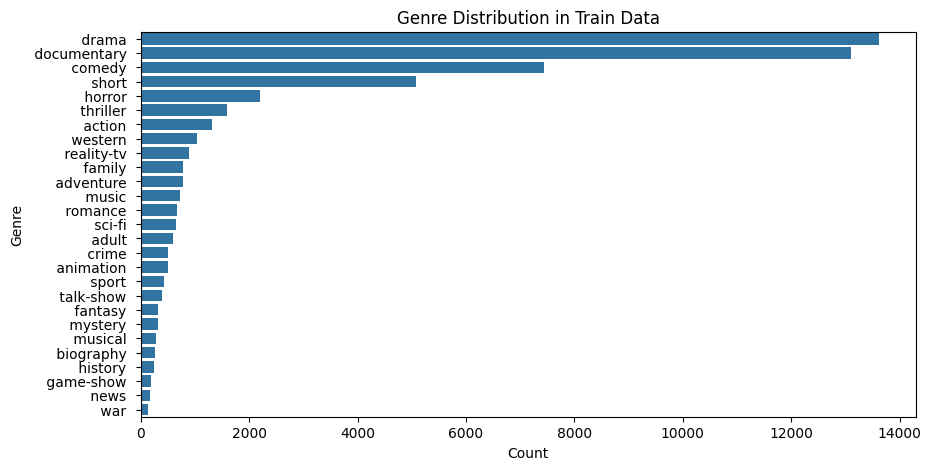

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Genre distribution in train data
plt.figure(figsize=(10, 5))
sns.countplot(y='Genre', data=train_data, order=train_data['Genre'].value_counts().index)
plt.title('Genre Distribution in Train Data')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

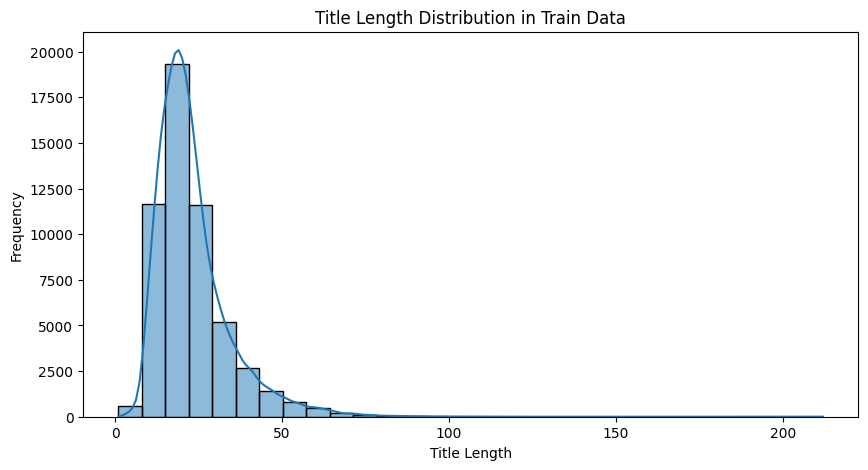

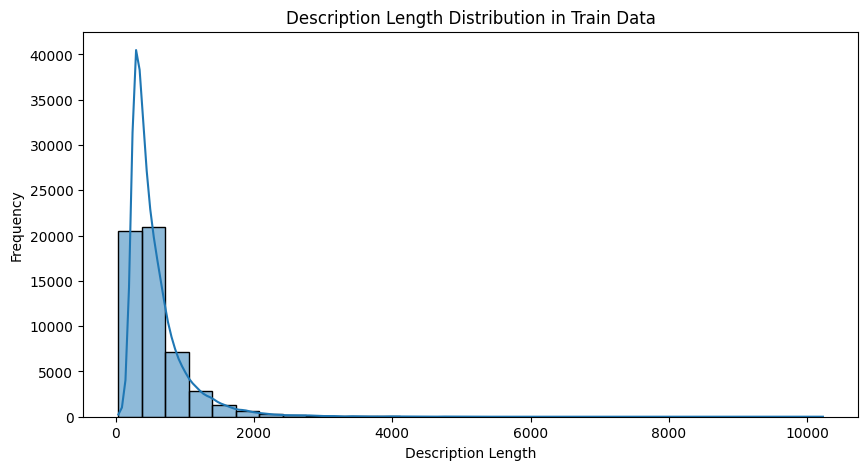

In [15]:
# Calculate the length of each Title and Description
train_data['Title_Length'] = train_data['Title'].apply(len)
train_data['Description_Length'] = train_data['Description'].apply(len)

test_data['Title_Length'] = test_data['Title'].apply(len)
test_data['Description_Length'] = test_data['Description'].apply(len)

# Plot the distribution of Title lengths in train data
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Title_Length'], bins=30, kde=True)
plt.title('Title Length Distribution in Train Data')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Description lengths in train data
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Description_Length'], bins=30, kde=True)
plt.title('Description Length Distribution in Train Data')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()


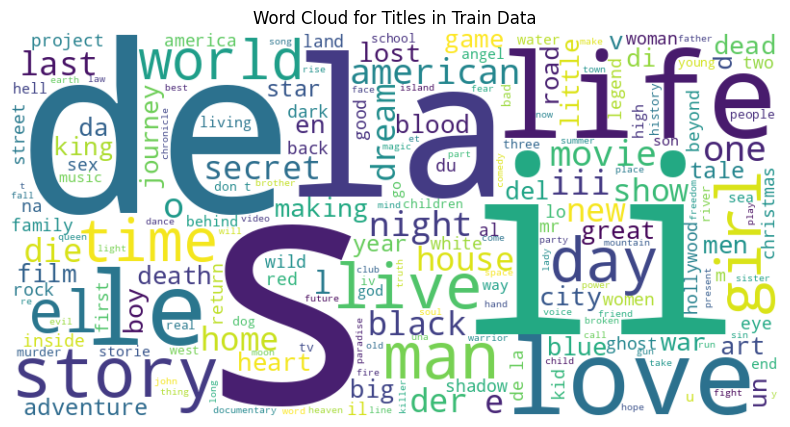

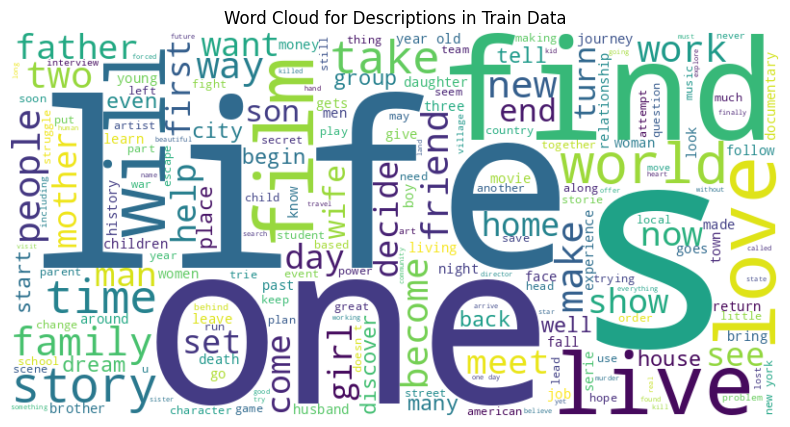

In [16]:
from wordcloud import WordCloud

# Generate a word cloud for Titles in train data
title_text = ' '.join(train_data['Title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Titles in Train Data')
plt.show()

# Generate a word cloud for Descriptions in train data
description_text = ' '.join(train_data['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(description_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Descriptions in Train Data')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Combine Title and Description into a single text feature
train_data['Text'] = train_data['Title'] + ' ' + train_data['Description']
test_data['Text'] = test_data['Title'] + ' ' + test_data['Description']

# Encode the target variable (Genre)
label_encoder = LabelEncoder()
train_data['Genre'] = label_encoder.fit_transform(train_data['Genre'])

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['Text'], train_data['Genre'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(test_data['Text'])

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_tfidf)

# Evaluate the model
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Print a detailed classification report
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))


Validation Accuracy: 0.59

Classification Report on Validation Set:
               precision    recall  f1-score   support

      action        0.54      0.27      0.36       263
       adult        0.77      0.24      0.37       112
   adventure        0.40      0.14      0.20       139
   animation        0.64      0.07      0.12       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.62      0.57      1443
       crime        0.14      0.01      0.02       107
 documentary        0.67      0.86      0.75      2659
       drama        0.56      0.78      0.65      2697
      family        0.35      0.09      0.14       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.47      0.64        40
     history        0.00      0.00      0.00        45
      horror        0.65      0.59      0.62       431
       music        0.64      0.50      0.56       144
     musical        0.67      0.04      0.08       

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [19]:
# Predict the genres for the test set
test_data['Predicted_Genre'] = model.predict(X_test_tfidf)

# Convert the predicted genre labels back to their original form
test_data['Predicted_Genre'] = label_encoder.inverse_transform(test_data['Predicted_Genre'])

# Display the first few rows of the test data with predictions
print(test_data[['Title', 'Description', 'Predicted_Genre']].head())

  Title                                        Description Predicted_Genre
0     1  l r brane loves his life his car his apartment...         comedy 
1     2  spain march 1964 quico is a very naughty child...          drama 
2     3  one year in the life of albin and his family o...    documentary 
3     4  his father has died he hasn t spoken with his ...          drama 
4     5  before he was known internationally as a marti...          drama 


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Evaluate on the validation set
y_val_pred = model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Detailed classification report for the validation set
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

Validation Accuracy: 0.59

Classification Report on Validation Set:
               precision    recall  f1-score   support

      action        0.54      0.27      0.36       263
       adult        0.77      0.24      0.37       112
   adventure        0.40      0.14      0.20       139
   animation        0.64      0.07      0.12       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.62      0.57      1443
       crime        0.14      0.01      0.02       107
 documentary        0.67      0.86      0.75      2659
       drama        0.56      0.78      0.65      2697
      family        0.35      0.09      0.14       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.47      0.64        40
     history        0.00      0.00      0.00        45
      horror        0.65      0.59      0.62       431
       music        0.64      0.50      0.56       144
     musical        0.67      0.04      0.08       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


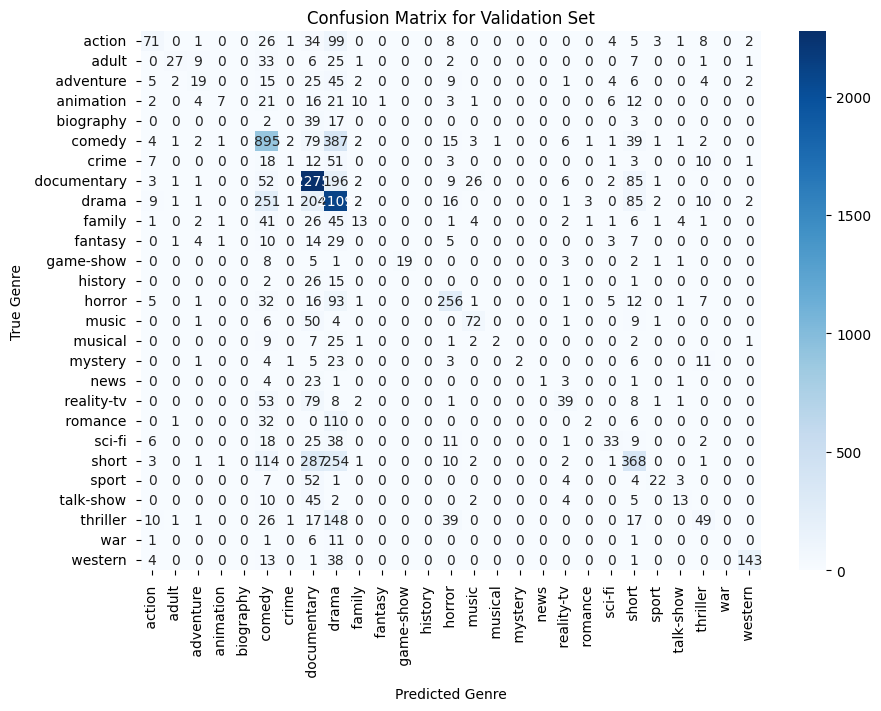

In [21]:
# Compute confusion matrix for validation set
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Validation Set')
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.show()

<ipython-input-22-6d0ee6fc02cc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Predicted_Genre', data=test_data, order=test_data['Predicted_Genre'].value_counts().index, palette='viridis')


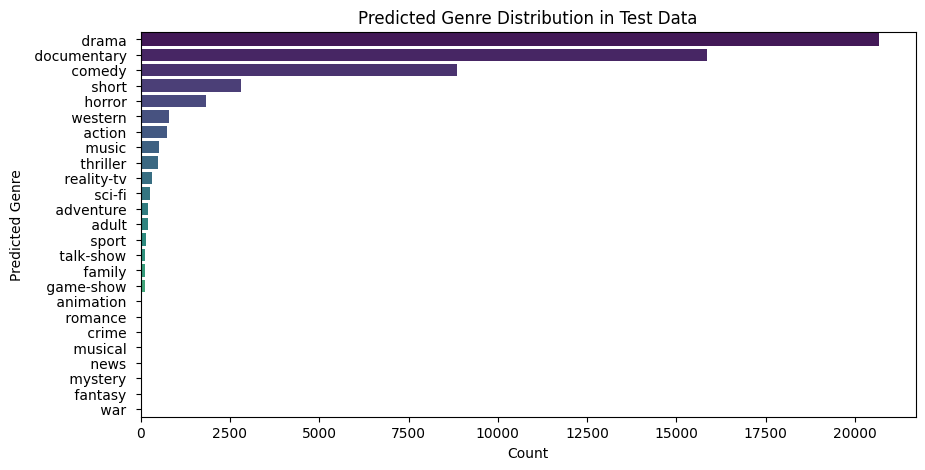

In [22]:
# Distribution of actual genres in the test set (if actual values are available)
if 'Actual_Genre' in test_data.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y='Actual_Genre', data=test_data, order=test_data['Actual_Genre'].value_counts().index, palette='cubehelix')
    plt.title('Actual Genre Distribution in Test Data')
    plt.xlabel('Count')
    plt.ylabel('Actual Genre')
    plt.show()

# Distribution of predicted genres in the test set
plt.figure(figsize=(10, 5))
sns.countplot(y='Predicted_Genre', data=test_data, order=test_data['Predicted_Genre'].value_counts().index, palette='viridis')
plt.title('Predicted Genre Distribution in Test Data')
plt.xlabel('Count')
plt.ylabel('Predicted Genre')
plt.show()